<a href="https://colab.research.google.com/github/angelafrocha/ProjetoSoulcode/blob/main/final_project_venda_prod_ETL_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 21.5 MB/s eta 0:00:00


##Declaração das LIBS

In [ ]:
import pandas as pd
import os
import numpy as np
import pandera as pa
import matplotlib.pyplot as plt
from google.cloud import storage
import pymongo
from pymongo import MongoClient

##Config . do pandas

In [ ]:
pd.set_option('display.max_columns',100)

##Conector para Cloud Storage(bucket)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/drive/MyDrive/key_pf/spry-ether-382812-774986df1787.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()

bucket = client.get_bucket('projetofinal1')

bucket.blob('vendas_prod_veiculos.csv/part-00000-5e3b5a6a-4761-4f6b-9e6a-b310430ac324-c000.csv')
path = 'gs://projetofinal1/temp/vendas_prod_veiculos.csv/part-00000-5e3b5a6a-4761-4f6b-9e6a-b310430ac324-c000.csv'

#Conectando ao mongo DB#

In [ ]:
uri = "mongodb+srv://clustere5.wjshwzt.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/key_pf/acessoPatricia.pem',
                     )
db = client['producao_venda']
colecao_tratado = db['tratado']

In [ ]:
colecao_tratado.count_documents({})

63

#Extração dos dados(Extract)#

In [ ]:
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')

#Pré-análise#

In [ ]:
df_bkp = df.copy()

In [ ]:
df.dtypes

data                              object
valorVendas_mercadoInterno         int64
Producao_Autoveiculos_total      float64
valorVendas_autoveiculosTotal      int64
valorVendas_concesTotal          float64
valorVendas_ConcesComerciais     float64
Producao_Automoveis              float64
dtype: object

In [ ]:
df.shape

(507, 7)

In [ ]:
df['data'].unique()

array(['1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
       '1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
       '1981-09-01', '1981-10-01', '1981-11-01', '1981-12-01',
       '1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
       '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
       '1982-09-01', '1982-10-01', '1982-11-01', '1982-12-01',
       '1983-01-01', '1983-02-01', '1983-03-01', '1983-04-01',
       '1983-05-01', '1983-06-01', '1983-07-01', '1983-08-01',
       '1983-09-01', '1983-10-01', '1983-11-01', '1983-12-01',
       '1984-01-01', '1984-02-01', '1984-03-01', '1984-04-01',
       '1984-05-01', '1984-06-01', '1984-07-01', '1984-08-01',
       '1984-09-01', '1984-10-01', '1984-11-01', '1984-12-01',
       '1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
       '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
       '1985-09-01', '1985-10-01', '1985-11-01', '1985-12-01',
       '1986-01-01', '1986-02-01', '1986-03-01', '1986-

In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data                           507 non-null    datetime64[ns]
 1   valorVendas_mercadoInterno     507 non-null    int64         
 2   Producao_Autoveiculos_total    363 non-null    float64       
 3   valorVendas_autoveiculosTotal  507 non-null    int64         
 4   valorVendas_concesTotal        399 non-null    float64       
 5   valorVendas_ConcesComerciais   399 non-null    float64       
 6   Producao_Automoveis            363 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 27.9 KB


In [ ]:
df.isnull().sum()

data                               0
valorVendas_mercadoInterno         0
Producao_Autoveiculos_total      144
valorVendas_autoveiculosTotal      0
valorVendas_concesTotal          108
valorVendas_ConcesComerciais     108
Producao_Automoveis              144
dtype: int64

In [ ]:
# 144 de 70000436 = 0,0002%
df['Producao_Autoveiculos_total'].sum()

70000436.0

In [ ]:
df['Producao_Autoveiculos_total'].unique()

array([    nan,  66168.,  73042.,  98691.,  88839., 101055., 102512.,
       104493., 115800., 106990., 109989., 111043.,  94678.,  93357.,
        95060., 122600.,  94820., 119441., 109101., 114188., 127038.,
       103372., 108978., 124173., 109563.,  78192., 110168., 131859.,
       117064., 136548., 153241., 106135., 140683., 119247., 134566.,
       129650., 102323., 100946., 121248., 136019., 130698., 142309.,
       121143., 153931., 161906., 146060., 148219., 141674., 118982.,
       124889., 136323., 153164., 172391., 162310., 170685., 160400.,
       173863., 182952., 192829., 130140., 101255., 110243., 105964.,
       141749., 137785., 160231., 146151., 126825., 134224., 134540.,
        92855.,  79643.,  59650.,  81902.,  78103., 114873., 109148.,
       114047., 116990., 115312., 129287., 130444., 109990., 108670.,
        81211.,  92704., 126595., 130730., 129116., 144738., 145172.,
       141751., 161503., 141474., 140295., 128920., 122850., 116359.,
       135125., 1725

In [ ]:
# 108 de 69589534 = 0,00015%
df['valorVendas_concesTotal'].sum()

69589534.0

In [ ]:
df['valorVendas_concesTotal'].unique()

array([    nan,  69792.,  57258.,  32740.,  32812.,  58464.,  37632.,
        43697.,  84707.,  75195.,  80938.,  73082.,  66391.,  60486.,
        58540.,  66155.,  39851.,  55941.,  68826.,  85112.,  78648.,
        73080.,  80372.,  69039.,  55458.,  55747.,  45472.,  39612.,
        76270.,  62091.,  67800.,  71403.,  67980.,  69585.,  72163.,
        75357.,  67997.,  61071.,  66606.,  90636.,  82832.,  90675.,
        92286.,  94397., 109283., 101182.,  97551., 105926., 105746.,
        93915.,  91542., 114805.,  96698., 118772., 120281., 109044.,
       159083., 114803., 127987., 139273., 140448., 110921., 132244.,
       178474., 135202., 135837., 137598., 133326., 155183., 137920.,
       146628., 146066., 135447., 113611., 129557., 135244., 128993.,
       147166., 129070., 153716., 151652., 165120., 163423., 158599.,
       152407., 150152., 137523., 159027., 176706., 167344., 167959.,
       175383., 173822., 180865., 185697., 140970., 115568., 125788.,
       115902., 1286

In [ ]:
# 108 de 69589534 = 0,00015%
df['valorVendas_ConcesComerciais'].sum()

69589534.0

In [ ]:
df['valorVendas_ConcesComerciais'].unique()

array([    nan,  69792.,  57258.,  32740.,  32812.,  58464.,  37632.,
        43697.,  84707.,  75195.,  80938.,  73082.,  66391.,  60486.,
        58540.,  66155.,  39851.,  55941.,  68826.,  85112.,  78648.,
        73080.,  80372.,  69039.,  55458.,  55747.,  45472.,  39612.,
        76270.,  62091.,  67800.,  71403.,  67980.,  69585.,  72163.,
        75357.,  67997.,  61071.,  66606.,  90636.,  82832.,  90675.,
        92286.,  94397., 109283., 101182.,  97551., 105926., 105746.,
        93915.,  91542., 114805.,  96698., 118772., 120281., 109044.,
       159083., 114803., 127987., 139273., 140448., 110921., 132244.,
       178474., 135202., 135837., 137598., 133326., 155183., 137920.,
       146628., 146066., 135447., 113611., 129557., 135244., 128993.,
       147166., 129070., 153716., 151652., 165120., 163423., 158599.,
       152407., 150152., 137523., 159027., 176706., 167344., 167959.,
       175383., 173822., 180865., 185697., 140970., 115568., 125788.,
       115902., 1286

In [ ]:
# 144 de 66024475 = 0,00021%
df['Producao_Automoveis'].sum()

66024475.0

In [ ]:
df['Producao_Automoveis'].unique()

array([    nan,  62913.,  70663.,  93322.,  83861.,  95587.,  96818.,
        98985., 109389., 100182., 103272., 104836.,  90390.,  88749.,
        90725., 116167.,  90052., 112323., 102368., 107274., 119641.,
        97492., 101700., 116339., 103115.,  71726., 102750., 123153.,
       109106., 128367., 143531.,  97018., 131052., 113669., 126807.,
       122873.,  99891.,  96271., 115677., 130533., 124332., 136930.,
       116101., 148804., 156130., 141503., 141467., 136525., 115122.,
       119922., 131345., 147478., 166059., 156073., 163533., 151990.,
       165805., 173614., 182927., 122201.,  96752., 104159., 100123.,
       134201., 129541., 151137., 137382., 118016., 126461., 127071.,
        86228.,  74360.,  57627.,  76130.,  72574., 108144., 103885.,
       108230., 110777., 109826., 123126., 124331., 104168., 102213.,
        77064.,  88435., 120251., 123461., 121388., 135402., 136157.,
       132860., 151584., 132418., 131719., 122081., 117675., 109553.,
       127632., 1626

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data                           507 non-null    datetime64[ns]
 1   valorVendas_mercadoInterno     507 non-null    int64         
 2   Producao_Autoveiculos_total    363 non-null    float64       
 3   valorVendas_autoveiculosTotal  507 non-null    int64         
 4   valorVendas_concesTotal        399 non-null    float64       
 5   valorVendas_ConcesComerciais   399 non-null    float64       
 6   Producao_Automoveis            363 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 27.9 KB


#Tratamento#

In [ ]:
#convertendo campo data para date
df['data'] = pd.to_datetime(df['data'])

In [ ]:
#Criando uma nova coluna ano para facilitar a nossa análise
df['ano'] = df.data.dt.year

In [ ]:
df['ano'].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data                           507 non-null    datetime64[ns]
 1   valorVendas_mercadoInterno     507 non-null    int64         
 2   Producao_Autoveiculos_total    363 non-null    float64       
 3   valorVendas_autoveiculosTotal  507 non-null    int64         
 4   valorVendas_concesTotal        399 non-null    float64       
 5   valorVendas_ConcesComerciais   399 non-null    float64       
 6   Producao_Automoveis            363 non-null    float64       
 7   ano                            507 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 31.8 KB


In [ ]:
ft2018 = df.ano >= 2018

In [ ]:
"""
Recebendo o filtro para pegar os dados somente a partir de 2018, pois todas as análises
serão realizadas a partir deste ano
"""
df = df.loc[ft2018].copy()

In [ ]:
df

,data,valorVendas_mercadoInterno,Producao_Autoveiculos_total,valorVendas_autoveiculosTotal,valorVendas_concesTotal,valorVendas_ConcesComerciais,Producao_Automoveis,ano
444,2018-01-01,160277,219217.0,206675,181245.0,181245.0,210565.0,2018
445,2018-02-01,138510,213498.0,204831,156880.0,156880.0,203610.0,2018
446,2018-03-01,182935,267539.0,250423,207353.0,207353.0,254759.0,2018
447,2018-04-01,190515,266549.0,263490,217322.0,217322.0,254154.0,2018
448,2018-05-01,175634,212329.0,236388,201870.0,201870.0,203081.0,2018
...,...,...,...,...,...,...,...,...
502,2022-11-01,174009,215796.0,217446,203998.0,203998.0,197706.0,2022
503,2022-12-01,187179,191567.0,218387,216909.0,216909.0,175095.0,2022
504,2023-01-01,122410,152666.0,155458,142826.0,142826.0,147835.0,2023
505,2023-02-01,112446,161181.0,146759,129900.0,129900.0,151783.0,2023


In [ ]:
df["ano"].unique()

array([2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
df.isnull().sum()

data                             0
valorVendas_mercadoInterno       0
Producao_Autoveiculos_total      0
valorVendas_autoveiculosTotal    0
valorVendas_concesTotal          0
valorVendas_ConcesComerciais     0
Producao_Automoveis              0
ano                              0
dtype: int64

In [ ]:
# DROP DOS DADOS NULOS, VISTO QUE POSSUEM UMA QUANTIDADE PEQUENA EM RELAÇÃO AO TODO
df = df.dropna()

In [ ]:
df.isnull().sum()

data                             0
valorVendas_mercadoInterno       0
Producao_Autoveiculos_total      0
valorVendas_autoveiculosTotal    0
valorVendas_concesTotal          0
valorVendas_ConcesComerciais     0
Producao_Automoveis              0
ano                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 444 to 506
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data                           63 non-null     datetime64[ns]
 1   valorVendas_mercadoInterno     63 non-null     int64         
 2   Producao_Autoveiculos_total    63 non-null     float64       
 3   valorVendas_autoveiculosTotal  63 non-null     int64         
 4   valorVendas_concesTotal        63 non-null     float64       
 5   valorVendas_ConcesComerciais   63 non-null     float64       
 6   Producao_Automoveis            63 non-null     float64       
 7   ano                            63 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 4.4 KB


In [ ]:
df['mes'] = df.data.dt.month

In [ ]:
df

,data,valorVendas_mercadoInterno,Producao_Autoveiculos_total,valorVendas_autoveiculosTotal,valorVendas_concesTotal,valorVendas_ConcesComerciais,Producao_Automoveis,ano,mes
444,2018-01-01,160277,219217.0,206675,181245.0,181245.0,210565.0,2018,1
445,2018-02-01,138510,213498.0,204831,156880.0,156880.0,203610.0,2018,2
446,2018-03-01,182935,267539.0,250423,207353.0,207353.0,254759.0,2018,3
447,2018-04-01,190515,266549.0,263490,217322.0,217322.0,254154.0,2018,4
448,2018-05-01,175634,212329.0,236388,201870.0,201870.0,203081.0,2018,5
...,...,...,...,...,...,...,...,...,...
502,2022-11-01,174009,215796.0,217446,203998.0,203998.0,197706.0,2022,11
503,2022-12-01,187179,191567.0,218387,216909.0,216909.0,175095.0,2022,12
504,2023-01-01,122410,152666.0,155458,142826.0,142826.0,147835.0,2023,1
505,2023-02-01,112446,161181.0,146759,129900.0,129900.0,151783.0,2023,2


In [ ]:
#Drop da coluna data, pois já não é mais util, visto que todos os dias se repetem
#e as informações de ano e mês já foram extraídas
df.drop(['data'], axis=1,inplace=True)

In [ ]:
'''
Após a analise dos dados, percebemos que a coluna referente as vendas de
mercado interno não será útil a nível de comparação aos outros dados
de outros dataset, por isso optamos por apagar a coluna
'''
df.drop(['valorVendas_mercadoInterno'], axis=1,inplace=True)

In [ ]:
'''
colunas valorVendas_concesTotal e valorVendas_ConcesComerciais possuem valores
duplicados, por isso optamos por apagar a coluna valorVendas_ConcesComerciais
'''
df.drop(['valorVendas_ConcesComerciais'], axis=1,inplace=True)

In [ ]:
'''
A coluna Producao_Automoveis se refere a quantidade de veículos comerciais
leves produzidos, após realizar as analises correlacionando aos outros datasets
percebemos que este valor não será útil a nível de comparação aos outros dados
de outros dataset, por isso optamos por apagar a coluna
'''
df.drop(['Producao_Automoveis'], axis=1,inplace=True)

In [ ]:
df.columns

Index(['Producao_Autoveiculos_total', 'valorVendas_autoveiculosTotal',
       'valorVendas_concesTotal', 'ano', 'mes'],
      dtype='object')

In [ ]:
#renomeando para facilitar a compreensão das colunas
df.rename(columns={'Producao_Autoveiculos_total' : 'Producao_veiculos_total',
                   'valorVendas_autoveiculosTotal' : 'qtdVendas_veiculosTotal',
                   'valorVendas_concesTotal' : 'qtdVendas_concesTotal'},inplace=True)

In [ ]:
df.columns

Index(['Producao_veiculos_total', 'qtdVendas_veiculosTotal',
       'qtdVendas_concesTotal', 'ano', 'mes'],
      dtype='object')

#Criação do Schema#

In [ ]:
df.columns

Index(['Producao_veiculos_total', 'qtdVendas_veiculosTotal',
       'qtdVendas_concesTotal', 'ano', 'mes'],
      dtype='object')

In [ ]:
df.dtypes

Producao_veiculos_total    float64
qtdVendas_veiculosTotal      int64
qtdVendas_concesTotal      float64
ano                          int64
mes                          int64
dtype: object

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'Producao_veiculos_total':pa.Column(pa.Float64),
        'qtdVendas_veiculosTotal':pa.Column(pa.Int64),
        'qtdVendas_concesTotal':pa.Column(pa.Float64),
        'ano':pa.Column(pa.Int64),
        'mes':pa.Column(pa.Int64)
    }
)

In [ ]:
schema.validate(df)

,Producao_veiculos_total,qtdVendas_veiculosTotal,qtdVendas_concesTotal,ano,mes
444,219217.0,206675,181245.0,2018,1
445,213498.0,204831,156880.0,2018,2
446,267539.0,250423,207353.0,2018,3
447,266549.0,263490,217322.0,2018,4
448,212329.0,236388,201870.0,2018,5
...,...,...,...,...,...
502,215796.0,217446,203998.0,2022,11
503,191567.0,218387,216909.0,2022,12
504,152666.0,155458,142826.0,2023,1
505,161181.0,146759,129900.0,2023,2


##Plotagens

<Axes: xlabel='VENDAS TOTAL', ylabel='ANO'>

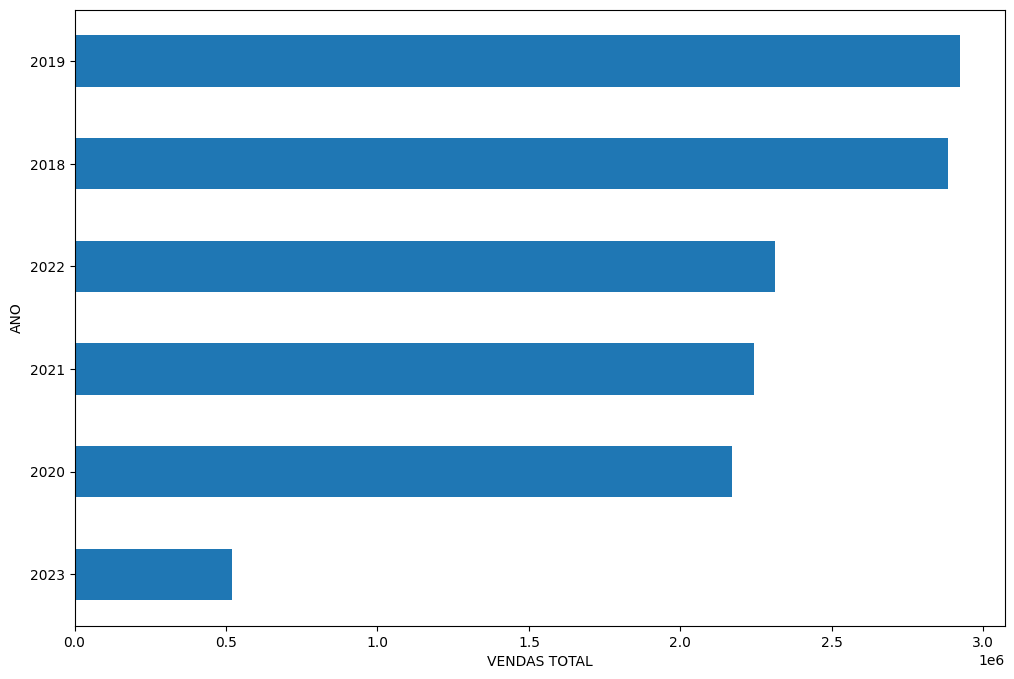

In [ ]:
# TOTAL DE VENDAS POR ANO
df.groupby(['ano'])['valorVendas_autoveiculosTotal'].sum().sort_values(ascending=True).plot.barh(figsize=(12,8),xlabel='VENDAS TOTAL',ylabel='ANO')

<Axes: xlabel='ANO', ylabel='PRODUÇÃO TOTAL'>

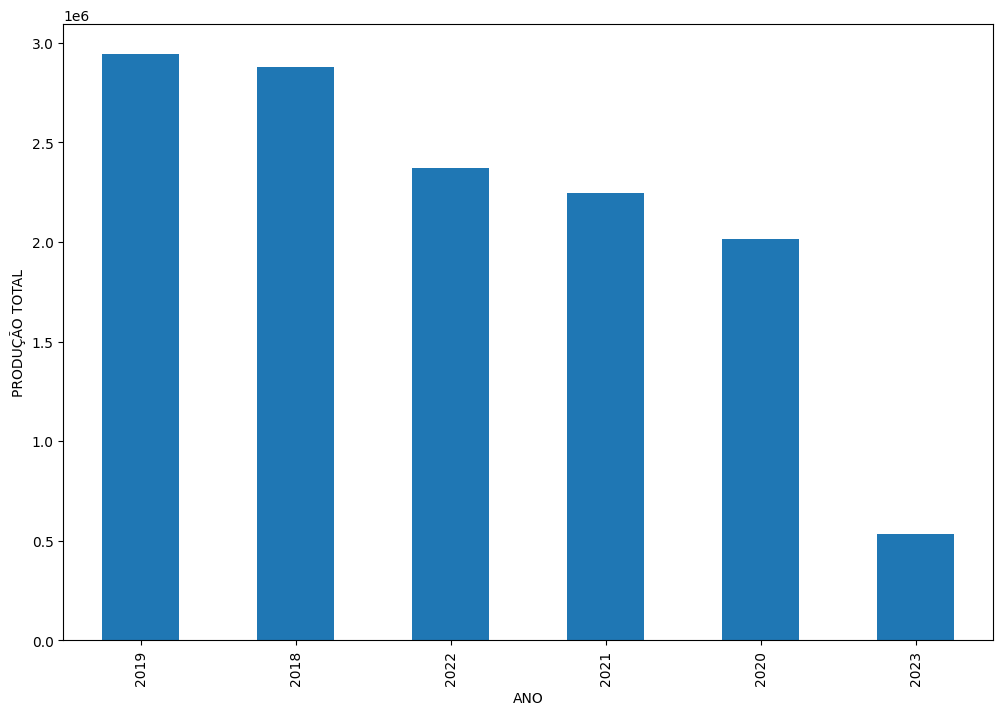

In [ ]:
# TOTAL PRODUZIDO POR ANO
df.groupby(['ano'])['Producao_Autoveiculos_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='PRODUÇÃO TOTAL')

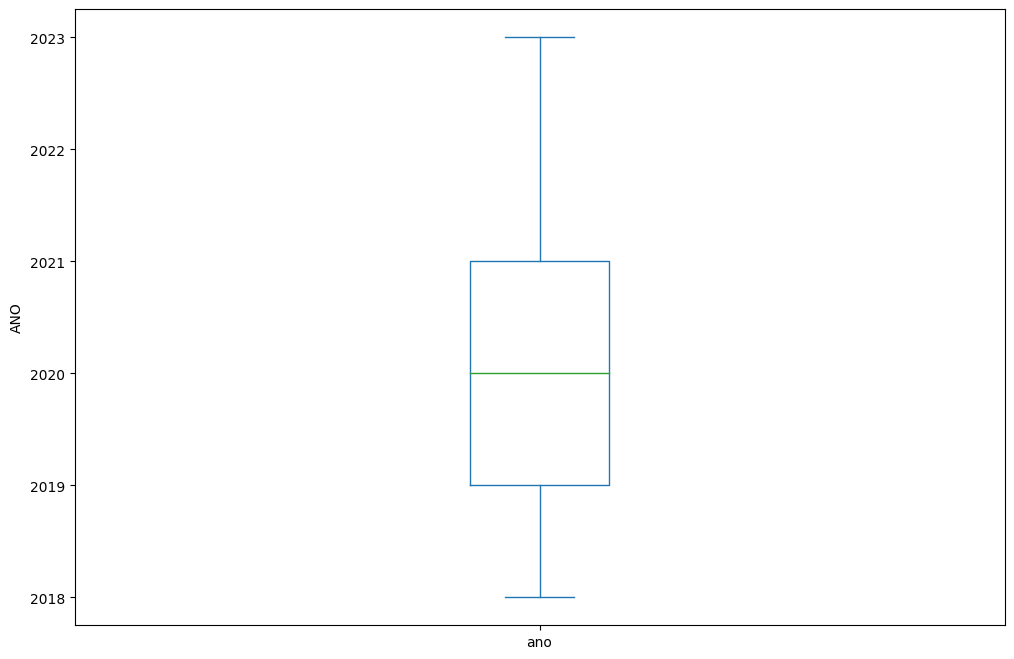

In [ ]:
#DISTRIBUIÇÃO DA PRODUÇÃO POR ANO

boxplot = df.groupby(['Producao_Autoveiculos_total'])['ano'].sum().plot(kind='box',
                                                        figsize=(12, 8),
                                                        xlabel='',
                                                        ylabel='ANO')

Text(0, 0.5, 'Vendas')

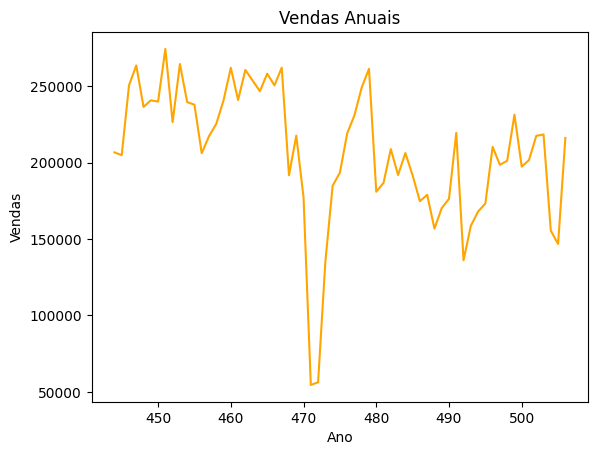

In [ ]:
plt.plot(df.index, df['valorVendas_autoveiculosTotal'], label='Produção',color = 'orange')
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Vendas')

Text(0, 0.5, 'Produção')

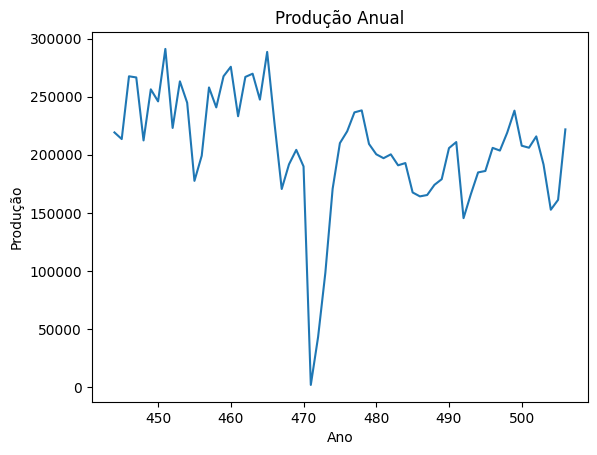

In [ ]:
plt.plot(df.index, df['Producao_Autoveiculos_total'], label='Produção')
plt.title('Produção Anual')
plt.xlabel('Ano')
plt.ylabel('Produção')

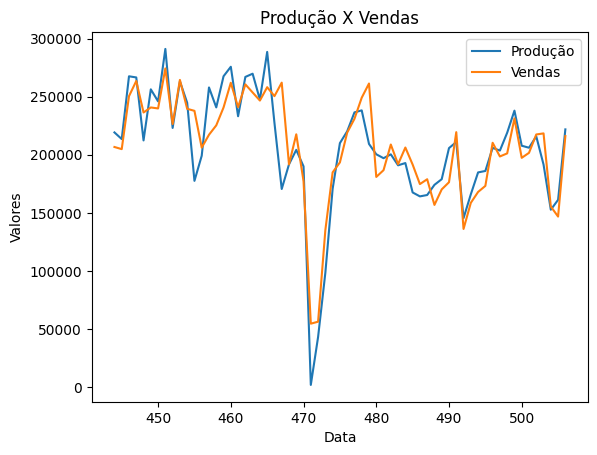

In [ ]:
# Criando o gráfico de série temporal
plt.plot(df.index, df['Producao_Autoveiculos_total'], label='Produção')
plt.plot(df.index, df['valorVendas_autoveiculosTotal'], label='Vendas')

# Configurando o estilo do gráfico
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Produção X Vendas')
plt.legend()

#Carregamento#

In [ ]:
df.columns

Index(['Producao_veiculos_total', 'qtdVendas_veiculosTotal',
       'qtdVendas_concesTotal', 'ano', 'mes'],
      dtype='object')

In [ ]:
df

,Producao_veiculos_total,qtdVendas_veiculosTotal,qtdVendas_concesTotal,ano,mes
444,219217.0,206675,181245.0,2018,1
445,213498.0,204831,156880.0,2018,2
446,267539.0,250423,207353.0,2018,3
447,266549.0,263490,217322.0,2018,4
448,212329.0,236388,201870.0,2018,5
...,...,...,...,...,...
502,215796.0,217446,203998.0,2022,11
503,191567.0,218387,216909.0,2022,12
504,152666.0,155458,142826.0,2023,1
505,161181.0,146759,129900.0,2023,2


In [ ]:
#carregando o dado tratado a pasta de tratados no bucket
df.to_csv('gs://projetofinal1/tratados/producao_vendas.csv',index=False)

In [ ]:
#inserindo os dados tratados no mongo
colecao_tratado.insert_many(df.to_dict('records'))

In [ ]:
colecao_tratado.count_documents({})

63